In [ ]:
#1. Recursive Dfs. Read the undirected unweighted graph from a .csv file.
import csv
from collections import defaultdict

def read_graph_from_csv(filename):
    graph = defaultdict(list)
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header (source,destination)
        for source, destination in reader:
            graph[source].append(destination)
            graph[destination].append(source)  #coz it's undirected
    return graph

def dfs_recursive(graph, node, visited):
    if node not in visited:
        print(node, end=" ")
        visited.add(node)
        for neighbor in graph[node]:
            dfs_recursive(graph, neighbor, visited)

if __name__ == "__main__":
    filename = 'graph.csv'
    graph = read_graph_from_csv(filename)
    print("Graph adjacency list:")
    for node, neighbors in graph.items():
        print(f"{node}: {neighbors}")

    print("\nDFS traversal starting from 'A':")
    visited = set()
    dfs_recursive(graph, 'A', visited)

Graph adjacency list:
A: ['B', 'C']
B: ['A', 'D']
C: ['A', 'E']
D: ['B', 'E']
E: ['C', 'D']

DFS traversal starting from 'A':
A B D E C 

In [ ]:
#2. Implement Non-Recursive Df Read the undirected unweighted graph from user.
from collections import defaultdict

def read_graph_from_user():
    graph = defaultdict(list)
    num_edges = int(input("Enter the number of edges: "))

    print("Enter each edge in the format: source destination")
    for _ in range(num_edges):
        u, v = input().split()
        graph[u].append(v)
        graph[v].append(u)  # Since it's undirected
    return graph

def dfs_iterative(graph, start_node):
    visited = set()
    stack = [start_node]

    while stack:
        node = stack.pop()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            # Add neighbors to stack
            for neighbor in reversed(graph[node]):  # reverse for consistent ordering
                if neighbor not in visited:
                    stack.append(neighbor)

# Example usage
if __name__ == "__main__":
    graph = read_graph_from_user()
    print("\nGraph adjacency list:")
    for node, neighbors in graph.items():
        print(f"{node}: {neighbors}")

    start = input("\nEnter the starting node for DFS: ")
    print("\nDFS traversal (iterative):")
    dfs_iterative(graph, start)


Enter the number of edges: 5
Enter each edge in the format: source destination
a b
b c
c d
d e
e a

Graph adjacency list:
a: ['b', 'e']
b: ['a', 'c']
c: ['b', 'd']
d: ['c', 'e']
e: ['d', 'a']

Enter the starting node for DFS: d

DFS traversal (iterative):
d c b a e 

In [ ]:
#3. Implement Bfs Algorithm. Read the undirected unweighted graph from user.
from collections import defaultdict, deque

def read_graph_from_user():
    graph = defaultdict(list)
    num_edges = int(input("Enter the number of edges: "))

    print("Enter each edge in the format: source destination")
    for _ in range(num_edges):
        u, v = input().split()
        graph[u].append(v)
        graph[v].append(u)  # Undirected graph
    return graph

def bfs(graph, start_node):
    visited = set()
    queue = deque([start_node])

    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)

# Example usage
if __name__ == "__main__":
    graph = read_graph_from_user()

    print("\nGraph adjacency list:")
    for node, neighbors in graph.items():
        print(f"{node}: {neighbors}")

    start = input("\nEnter the starting node for BFS: ")
    print("\nBFS traversal:")
    bfs(graph, start)


Enter the number of edges: 5
Enter each edge in the format: source destination
a c
c e
e d
d b
b c

Graph adjacency list:
a: ['c']
c: ['a', 'e', 'b']
e: ['c', 'd']
d: ['e', 'b']
b: ['d', 'c']

Enter the starting node for BFS: c

BFS traversal:
c a e b d 

In [ ]:
#4. Implement Bfs. Read the directed unweighted graph and the heuristic values from user.
from collections import defaultdict
import heapq

def read_graph_and_heuristics():
    graph = defaultdict(list)
    heuristic = {}

    num_edges = int(input("Enter number of edges: "))
    print("Enter each edge as: source destination")
    for _ in range(num_edges):
        u, v = input().split()
        graph[u].append(v)  # Directed graph

    num_nodes = int(input("Enter number of nodes to input heuristic values: "))
    print("Enter each node and its heuristic value (e.g., A 5):")
    for _ in range(num_nodes):
        node, h = input().split()
        heuristic[node] = int(h)

    return graph, heuristic

def best_first_search(graph, heuristic, start, goal):
    visited = set()
    priority_queue = []
    heapq.heappush(priority_queue, (heuristic[start], start))

    while priority_queue:
        h_value, current = heapq.heappop(priority_queue)
        if current not in visited:
            print(current, end=" ")
            visited.add(current)

            if current == goal:
                print("\nGoal reached!")
                return

            for neighbor in graph[current]:
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (heuristic[neighbor], neighbor))

    print("\nGoal not reachable.")

# Example usage
if __name__ == "__main__":
    graph, heuristic = read_graph_and_heuristics()

    print("\nGraph adjacency list:")
    for node, neighbors in graph.items():
        print(f"{node}: {neighbors}")

    start = input("\nEnter the starting node: ")
    goal = input("Enter the goal node: ")

    print("\nBest First Search traversal:")
    best_first_search(graph, heuristic, start, goal)


Enter number of edges: 5
Enter each edge as: source destination
a b
b d
d a
c b
c e
Enter number of nodes to input heuristic values: 5
Enter each node and its heuristic value (e.g., A 5):
a 2
b 6
c 7
d 1
e 4

Graph adjacency list:
a: ['b']
b: ['d']
d: ['a']
c: ['b', 'e']

Enter the starting node: b
Enter the goal node: e

Best First Search traversal:
b d a 
Goal not reachable.


In [ ]:
#5. Implement Bfs. Read the undirected weighted graph and the heuristic values from user.

import heapq
from collections import defaultdict

def read_graph_and_heuristic():
    graph = defaultdict(list)
    heuristic = {}

    n = int(input("Enter number of edges: "))
    print("Enter edges in format: node1 node2 weight")
    for _ in range(n):
        u, v, w = input().split()
        w = int(w)
        graph[u].append((v, w))
        graph[v].append((u, w))  # Undirected

    m = int(input("Enter number of nodes for heuristic values: "))
    print("Enter node and heuristic value:")
    for _ in range(m):
        node, h = input().split()
        heuristic[node] = int(h)

    return graph, heuristic

def best_first_search(graph, heuristic, start, goal):
    visited = set()
    queue = []
    heapq.heappush(queue, (heuristic[start], start))

    while queue:
        _, node = heapq.heappop(queue)
        if node not in visited:
            print(node, end=" ")
            visited.add(node)

            if node == goal:
                print("\nGoal Reached!")
                return

            for neighbor, _ in graph[node]:
                if neighbor not in visited:
                    heapq.heappush(queue, (heuristic[neighbor], neighbor))

if __name__ == "__main__":
    graph, heuristic = read_graph_and_heuristic()
    start = input("\nEnter start node: ")
    goal = input("Enter goal node: ")

    print("\nBest First Search Path:")
    best_first_search(graph, heuristic, start, goal)


Enter number of edges: 6
Enter edges in format: node1 node2 weight
a b 5
b d 6
d e 7
e b 1
c d 4
a e 5
Enter number of nodes for heuristic values: 5
Enter node and heuristic value:
a 1
b 2
d 4
e 5
c 7

Enter start node: a
Enter goal node: d

Best First Search Path:
a b d 
Goal Reached!


In [ ]:
#6. Bfs Read the undirected unweighted graph and the heuristic values from user.
def read_graph_and_heuristic_unweighted():
    graph = defaultdict(list)
    heuristic = {}

    n = int(input("Enter number of edges: "))
    print("Enter edges in format: node1 node2")
    for _ in range(n):
        u, v = input().split()
        graph[u].append((v, 1))
        graph[v].append((u, 1))

    m = int(input("Enter number of nodes for heuristic values: "))
    print("Enter node and heuristic value:")
    for _ in range(m):
        node, h = input().split()
        heuristic[node] = int(h)

    return graph, heuristic

def best_first_search(graph, heuristic, start, goal):
    visited = set()
    queue = []
    heapq.heappush(queue, (heuristic[start], start))

    while queue:
        _, node = heapq.heappop(queue)
        if node not in visited:
            print(node, end=" ")
            visited.add(node)

            if node == goal:
                print("\nGoal Reached!")
                return

            for neighbor, _ in graph[node]:
                if neighbor not in visited:
                    heapq.heappush(queue, (heuristic[neighbor], neighbor))

if __name__ == "__main__":
    graph, heuristic = read_graph_and_heuristic_unweighted()
    start = input("\nEnter start node: ")
    goal = input("Enter goal node: ")

    print("\nBest First Search Path:")
    best_first_search(graph, heuristic, start, goal)


Enter number of edges: 4
Enter edges in format: node1 node2
a b
b c
c a
d b
Enter number of nodes for heuristic values: 4
Enter node and heuristic value:
a 1
b 2
c 3
d 4

Enter start node: a
Enter goal node: c

Best First Search Path:
a b c 
Goal Reached!


In [ ]:
#7. Implement Bfs Read the directed weighted graph and the heuristic values from user.
def read_directed_graph_and_heuristic():
    graph = defaultdict(list)
    heuristic = {}

    n = int(input("Enter number of edges: "))
    print("Enter edges in format: node1 node2 weight")
    for _ in range(n):
        u, v, w = input().split()
        w = int(w)
        graph[u].append((v, w))  # Directed only

    m = int(input("Enter number of nodes for heuristic values: "))
    print("Enter node and heuristic value:")
    for _ in range(m):
        node, h = input().split()
        heuristic[node] = int(h)

    return graph, heuristic

def best_first_search(graph, heuristic, start, goal):
    visited = set()
    queue = []
    # Check if start node is in heuristic
    if start not in heuristic:
        print(f"Starting node '{start}' not found in heuristic values.")
        return

    heapq.heappush(queue, (heuristic[start], start))

    while queue:
        _, node = heapq.heappop(queue)
        if node not in visited:
            print(node, end=" ")
            visited.add(node)

            if node == goal:
                print("\nGoal Reached!")
                return

            for neighbor, _ in graph[node]:
                if neighbor not in visited:
                    if neighbor in heuristic:
                        heapq.heappush(queue, (heuristic[neighbor], neighbor))
                    else:
                        print(f"Heuristic value for node '{neighbor}' not found. Skipping.")

    print("\nGoal not reachable.")

if __name__ == "__main__":
    graph, heuristic = read_directed_graph_and_heuristic()
    start = input("\nEnter start node: ")
    goal = input("Enter goal node: ")

    print("\nBest First Search Path:")
    best_first_search(graph, heuristic, start, goal)

Enter number of edges: 5
Enter edges in format: node1 node2 weight
a b 5
c d 4
e a 2
a d 7
d c 3
Enter number of nodes for heuristic values: 2
Enter node and heuristic value:
a 5
b 5

Enter start node: a
Enter goal node: d

Best First Search Path:
a Heuristic value for node 'd' not found. Skipping.
b 
Goal not reachable.


In [ ]:
#8. Implement A* algorithm. Read directed weighted graph and heuristic values from a .csv file.
import pandas as pd
import heapq

def a_star_algorithm(edges_file, heuristic_file):
    # Read edges and heuristic from CSV files
    edges_df = pd.read_csv(edges_file)
    heuristic_df = pd.read_csv(heuristic_file)

    # Create graph
    graph = {}
    for _, row in edges_df.iterrows():
        graph.setdefault(row['source'], []).append((row['destination'], row['weight']))

    # Create heuristic dictionary
    heuristics = dict(zip(heuristic_df['node'], heuristic_df['heuristic']))

    # Take user input
    start_node = input("Enter the Start Node: ").strip().upper()
    goal_node = input("Enter the Goal Node: ").strip().upper()

    # A* search
    open_set = []
    heapq.heappush(open_set, (heuristics[start_node], 0, start_node, [start_node]))
    visited = set()

    while open_set:
        est_total_cost, cost_so_far, current_node, path = heapq.heappop(open_set)

        if current_node == goal_node:
            print(f"Path found: {' -> '.join(path)} with total cost {cost_so_far}")
            return

        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor, weight in graph.get(current_node, []):
            if neighbor not in visited:
                total_cost = cost_so_far + weight
                est_cost = total_cost + heuristics.get(neighbor, float('inf'))
                heapq.heappush(open_set, (est_cost, total_cost, neighbor, path + [neighbor]))

    print("No path found.")

# Correct path
edges_file = '/content/edges.csv'
heuristic_file = '/content/heuristic.csv'

# Call A* function
a_star_algorithm(edges_file, heuristic_file)


Enter the Start Node: a
Enter the Goal Node: d
Path found: A -> B -> D with total cost 3


In [ ]:
#9. Implement A* algorithm. Read directed weighted graph and heuristic values from user
import heapq

def best_first_search():
    # Taking input
    n = int(input("Enter number of edges: "))
    graph = {}

    print("Enter edges in format: source destination weight")
    for _ in range(n):
        src, dest, weight = input().split()
        weight = int(weight)
        if src not in graph:
            graph[src] = []
        graph[src].append((dest, weight))

    # Taking heuristics
    heuristics = {}
    m = int(input("Enter number of nodes for heuristics: "))
    print("Enter heuristics in format: node heuristic_value")
    for _ in range(m):
        node, h = input().split()
        # Convert node to uppercase to maintain consistency
        node = node.strip().upper()
        heuristics[node] = int(h)

    # Start and goal
    start = input("Enter start node: ").strip().upper()
    goal = input("Enter goal node: ").strip().upper()

    # Best First Search
    open_set = []
    heapq.heappush(open_set, (heuristics[start], start, [start]))
    visited = set()

    while open_set:
        h_val, current, path = heapq.heappop(open_set)

        if current == goal:
            print(f"Path found: {' -> '.join(path)}")
            return

        if current in visited:
            continue
        visited.add(current)

        for neighbor, _ in graph.get(current, []):
            if neighbor not in visited:
                heapq.heappush(open_set, (heuristics.get(neighbor, float('inf')), neighbor, path + [neighbor]))

    print("No path found.")

# Run the Best First Search function
best_first_search()

Enter number of edges: 3
Enter edges in format: source destination weight
a b 3
b c 1
c a 5
Enter number of nodes for heuristics: 3
Enter heuristics in format: node heuristic_value
a 1
b 2
c 3
Enter start node: a 
Enter goal node: c
No path found.


In [ ]:
#10. Implement A* algorithm. Read undirected weighted graph and heuristic values from a .csv file.
import heapq
import pandas as pd

def a_star_algorithm(edges_file, heuristic_file):
    try:
        # Load and clean graph edges
        edges_df = pd.read_csv(edges_file)
        edges_df.columns = edges_df.columns.str.strip()  # Strip extra spaces in column names
        expected_cols = {'source', 'destination', 'weight'}

        if not expected_cols.issubset(edges_df.columns):
            print(f"Error: edges.csv must have columns: {expected_cols}")
            return

        graph = {}
        for _, row in edges_df.iterrows():
            # Clean data by stripping extra spaces from the values
            src, dest, weight = str(row['source']).strip().upper(), str(row['destination']).strip().upper(), row['weight']
            graph.setdefault(src, []).append((dest, weight))
            graph.setdefault(dest, []).append((src, weight))  # For undirected graph

        # Load and clean heuristic values
        heuristic_df = pd.read_csv(heuristic_file)
        heuristic_df.columns = heuristic_df.columns.str.strip()  # Strip extra spaces in column names
        if not {'node', 'heuristic'}.issubset(heuristic_df.columns):
            print(f"Error: heuristic.csv must have columns: 'Node' and 'Heuristic'")
            return

        heuristics = dict((str(row['node']).strip().upper(), row['heuristic']) for _, row in heuristic_df.iterrows())

        # Get start and goal nodes from user input
        start = input("Enter Start Node: ").strip().upper()
        goal = input("Enter Goal Node: ").strip().upper()

        # Ensure start and goal nodes exist in the graph
        if start not in graph or goal not in graph:
            print("Start or Goal node not present in the graph!")
            return

        # Initialize open set for A* search
        open_set = []
        heapq.heappush(open_set, (heuristics[start], 0, start, [start]))  # (f_score, g_score, current_node, path)
        visited = set()

        while open_set:
            f_score, g_score, current, path = heapq.heappop(open_set)

            # Check if we've reached the goal
            if current == goal:
                print(f"\nPath found: {' -> '.join(path)}")
                print(f"Total cost: {g_score}")
                return

            # Skip visited nodes
            if current in visited:
                continue
            visited.add(current)

            # Explore neighbors
            for neighbor, cost in graph.get(current, []):
                if neighbor not in visited:
                    new_g = g_score + cost
                    new_f = new_g + heuristics.get(neighbor, float('inf'))
                    heapq.heappush(open_set, (new_f, new_g, neighbor, path + [neighbor]))

        print("\nNo path found between the given nodes.")

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# --- RUN ---
a_star_algorithm('edges.csv', 'heuristic.csv')


Enter Start Node: a
Enter Goal Node: e

Path found: A -> C -> E
Total cost: 5


In [ ]:
#11. Implement A* algorithm. Read undirected weighted graph and heuristic values from user.
import heapq

def a_star_algorithm():
    # Read the graph from user input
    graph = {}
    num_edges = int(input("Enter the number of edges: "))

    for _ in range(num_edges):
        edge = input("Enter edge (source, destination, weight): ").split()
        src, dest, weight = edge[0].strip().upper(), edge[1].strip().upper(), int(edge[2].strip())
        graph.setdefault(src, []).append((dest, weight))
        graph.setdefault(dest, []).append((src, weight))  # For undirected graph

    # Read the heuristic values from user input
    heuristics = {}
    num_nodes = int(input("Enter the number of nodes for heuristic values: "))

    for _ in range(num_nodes):
        node, heuristic = input("Enter node and heuristic value (node, heuristic): ").split()
        heuristics[node.strip().upper()] = int(heuristic.strip())

    # Get start and goal nodes from user input
    start = input("Enter Start Node: ").strip().upper()
    goal = input("Enter Goal Node: ").strip().upper()

    # Ensure start and goal nodes exist in the graph
    if start not in graph or goal not in graph:
        print("Start or Goal node not present in the graph!")
        return

    # Initialize open set for A* search
    open_set = []
    heapq.heappush(open_set, (heuristics[start], 0, start, [start]))  # (f_score, g_score, current_node, path)
    visited = set()

    while open_set:
        f_score, g_score, current, path = heapq.heappop(open_set)

        # Check if we've reached the goal
        if current == goal:
            print(f"\nPath found: {' -> '.join(path)}")
            print(f"Total cost: {g_score}")
            return

        # Skip visited nodes
        if current in visited:
            continue
        visited.add(current)

        # Explore neighbors
        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                new_g = g_score + cost
                new_f = new_g + heuristics.get(neighbor, float('inf'))
                heapq.heappush(open_set, (new_f, new_g, neighbor, path + [neighbor]))

    print("\nNo path found between the given nodes.")

a_star_algorithm()

Enter the number of edges: 3
Enter edge (source, destination, weight): a b 3
Enter edge (source, destination, weight): b c 4
Enter edge (source, destination, weight): c a 4
Enter the number of nodes for heuristic values: 3
Enter node and heuristic value (node, heuristic): a 4
Enter node and heuristic value (node, heuristic): b 5
Enter node and heuristic value (node, heuristic): c 6
Enter Start Node: a
Enter Goal Node: c

Path found: A -> C
Total cost: 4


Union of A and B: {'a': 0.7, 'd': 0.6, 'b': 0.8, 'e': 0.3, 'c': 0.9}
Intersection of A and B: {'a': 0.6, 'd': 0.4, 'b': 0.5, 'e': 0.1, 'c': 0.2}
Complement of A: {'a': 0.4, 'b': 0.19999999999999996, 'c': 0.8, 'd': 0.6, 'e': 0.9}


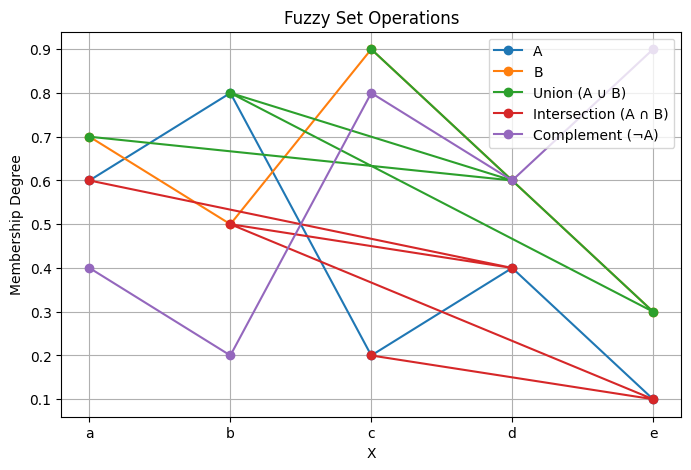

In [ ]:
#12. Implement Fuzzy set operations – union, intersection and complement. Demonstrate these operations with 3 fuzzy sets.
import matplotlib.pyplot as plt

# Function to calculate union of fuzzy sets
def fuzzy_union(set_a, set_b):
    return {x: max(set_a.get(x, 0), set_b.get(x, 0)) for x in set_a.keys() | set_b.keys()}

# Function to calculate intersection of fuzzy sets
def fuzzy_intersection(set_a, set_b):
    return {x: min(set_a.get(x, 0), set_b.get(x, 0)) for x in set_a.keys() | set_b.keys()}

# Function to calculate complement of a fuzzy set
def fuzzy_complement(set_a):
    return {x: 1 - membership for x, membership in set_a.items()}

# Function to plot fuzzy sets for visualization
def plot_fuzzy_sets(fuzzy_sets, title="Fuzzy Sets"):
    plt.figure(figsize=(8, 5))
    for label, fuzzy_set in fuzzy_sets.items():
        plt.plot(list(fuzzy_set.keys()), list(fuzzy_set.values()), label=label, marker='o')

    plt.xlabel('X')
    plt.ylabel('Membership Degree')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example fuzzy sets
A = {'a': 0.6, 'b': 0.8, 'c': 0.2, 'd': 0.4, 'e': 0.1}
B = {'a': 0.7, 'b': 0.5, 'c': 0.9, 'd': 0.6, 'e': 0.3}
C = {'a': 0.3, 'b': 0.4, 'c': 0.8, 'd': 0.5, 'e': 0.6}

# Perform fuzzy set operations
union_ab = fuzzy_union(A, B)
intersection_ab = fuzzy_intersection(A, B)
complement_a = fuzzy_complement(A)

# Display results
print("Union of A and B:", union_ab)
print("Intersection of A and B:", intersection_ab)
print("Complement of A:", complement_a)

# Visualize the fuzzy sets and operations
plot_fuzzy_sets({
    'A': A,
    'B': B,
    'Union (A ∪ B)': union_ab,
    'Intersection (A ∩ B)': intersection_ab,
    'Complement (¬A)': complement_a
}, "Fuzzy Set Operations")


Union of A and B: {'a': 0.7, 'd': 0.6, 'b': 0.8, 'e': 0.3, 'c': 0.9}
Intersection of A and B: {'a': 0.6, 'd': 0.4, 'b': 0.5, 'e': 0.1, 'c': 0.2}
Complement of A: {'a': 0.4, 'b': 0.19999999999999996, 'c': 0.8, 'd': 0.6, 'e': 0.9}
Complement of B: {'a': 0.30000000000000004, 'b': 0.5, 'c': 0.09999999999999998, 'd': 0.4, 'e': 0.7}
Complement of Union (¬(A ∪ B)): {'a': 0.30000000000000004, 'd': 0.4, 'b': 0.19999999999999996, 'e': 0.7, 'c': 0.09999999999999998}
Intersection of Complements (¬A ∩ ¬B): {'a': 0.30000000000000004, 'd': 0.4, 'b': 0.19999999999999996, 'e': 0.7, 'c': 0.09999999999999998}

De Morgan's Law Verification:
De Morgan's Law holds: ¬(A ∪ B) == (¬A ∩ ¬B)


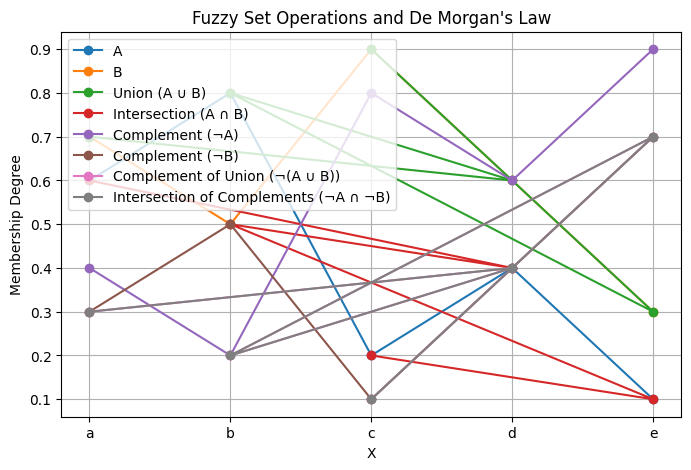

In [ ]:
#13. Implement Fuzzy set operations – union, intersection and complement. Demonstrate De Morgan’s Law ( Complement of Union) with 2 fuzzy sets.
import matplotlib.pyplot as plt

# Function to calculate union of fuzzy sets
def fuzzy_union(set_a, set_b):
    return {x: max(set_a.get(x, 0), set_b.get(x, 0)) for x in set_a.keys() | set_b.keys()}

# Function to calculate intersection of fuzzy sets
def fuzzy_intersection(set_a, set_b):
    return {x: min(set_a.get(x, 0), set_b.get(x, 0)) for x in set_a.keys() | set_b.keys()}

# Function to calculate complement of a fuzzy set
def fuzzy_complement(set_a):
    return {x: 1 - membership for x, membership in set_a.items()}

# Function to plot fuzzy sets for visualization
def plot_fuzzy_sets(fuzzy_sets, title="Fuzzy Sets"):
    plt.figure(figsize=(8, 5))
    for label, fuzzy_set in fuzzy_sets.items():
        plt.plot(list(fuzzy_set.keys()), list(fuzzy_set.values()), label=label, marker='o')

    plt.xlabel('X')
    plt.ylabel('Membership Degree')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example fuzzy sets
A = {'a': 0.6, 'b': 0.8, 'c': 0.2, 'd': 0.4, 'e': 0.1}
B = {'a': 0.7, 'b': 0.5, 'c': 0.9, 'd': 0.6, 'e': 0.3}

# Perform fuzzy set operations
union_ab = fuzzy_union(A, B)
intersection_ab = fuzzy_intersection(A, B)
complement_a = fuzzy_complement(A)
complement_b = fuzzy_complement(B)

# De Morgan's Law demonstration: Complement of Union = Complement of A ∩ Complement of B
complement_union_ab = fuzzy_complement(union_ab)
intersection_complement_ab = fuzzy_intersection(complement_a, complement_b)

# Display results
print("Union of A and B:", union_ab)
print("Intersection of A and B:", intersection_ab)
print("Complement of A:", complement_a)
print("Complement of B:", complement_b)
print("Complement of Union (¬(A ∪ B)):", complement_union_ab)
print("Intersection of Complements (¬A ∩ ¬B):", intersection_complement_ab)

# Verify De Morgan's Law
print("\nDe Morgan's Law Verification:")
if complement_union_ab == intersection_complement_ab:
    print("De Morgan's Law holds: ¬(A ∪ B) == (¬A ∩ ¬B)")
else:
    print("De Morgan's Law does not hold.")

# Visualize the fuzzy sets and operations
plot_fuzzy_sets({
    'A': A,
    'B': B,
    'Union (A ∪ B)': union_ab,
    'Intersection (A ∩ B)': intersection_ab,
    'Complement (¬A)': complement_a,
    'Complement (¬B)': complement_b,
    'Complement of Union (¬(A ∪ B))': complement_union_ab,
    'Intersection of Complements (¬A ∩ ¬B)': intersection_complement_ab
}, "Fuzzy Set Operations and De Morgan's Law")

Union of A and B: {'a': 0.7, 'd': 0.6, 'b': 0.8, 'e': 0.3, 'c': 0.9}
Intersection of A and B: {'a': 0.6, 'd': 0.4, 'b': 0.5, 'e': 0.1, 'c': 0.2}
Complement of A: {'a': 0.4, 'b': 0.19999999999999996, 'c': 0.8, 'd': 0.6, 'e': 0.9}
Complement of B: {'a': 0.30000000000000004, 'b': 0.5, 'c': 0.09999999999999998, 'd': 0.4, 'e': 0.7}
Complement of Intersection (¬(A ∩ B)): {'a': 0.4, 'd': 0.6, 'b': 0.5, 'e': 0.9, 'c': 0.8}
Union of Complements (¬A ∪ ¬B): {'a': 0.4, 'd': 0.6, 'b': 0.5, 'e': 0.9, 'c': 0.8}

De Morgan's Law Verification:
De Morgan's Law holds: ¬(A ∩ B) == (¬A ∪ ¬B)


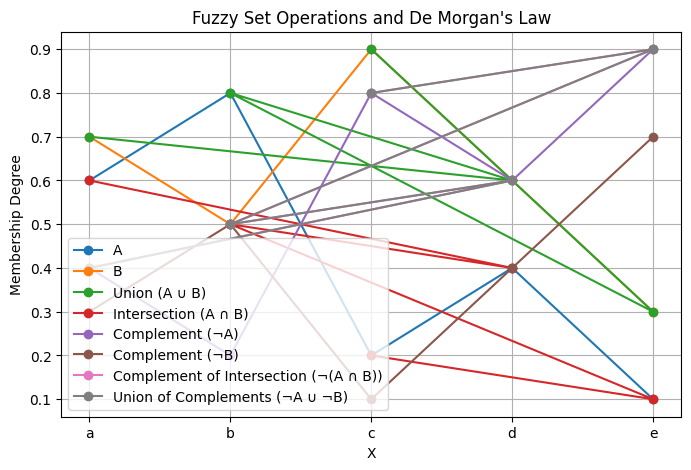

In [ ]:
#14. Implement Fuzzy set operations– union, intersection and complement. Demonstrate De Morgan’s Law (Complement of Intersection)with 2 fuzzy sets.
import matplotlib.pyplot as plt

# Function to calculate union of fuzzy sets
def fuzzy_union(set_a, set_b):
    return {x: max(set_a.get(x, 0), set_b.get(x, 0)) for x in set_a.keys() | set_b.keys()}

# Function to calculate intersection of fuzzy sets
def fuzzy_intersection(set_a, set_b):
    return {x: min(set_a.get(x, 0), set_b.get(x, 0)) for x in set_a.keys() | set_b.keys()}

# Function to calculate complement of a fuzzy set
def fuzzy_complement(set_a):
    return {x: 1 - membership for x, membership in set_a.items()}

# Function to plot fuzzy sets for visualization
def plot_fuzzy_sets(fuzzy_sets, title="Fuzzy Sets"):
    plt.figure(figsize=(8, 5))
    for label, fuzzy_set in fuzzy_sets.items():
        plt.plot(list(fuzzy_set.keys()), list(fuzzy_set.values()), label=label, marker='o')

    plt.xlabel('X')
    plt.ylabel('Membership Degree')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example fuzzy sets
A = {'a': 0.6, 'b': 0.8, 'c': 0.2, 'd': 0.4, 'e': 0.1}
B = {'a': 0.7, 'b': 0.5, 'c': 0.9, 'd': 0.6, 'e': 0.3}

# Perform fuzzy set operations
union_ab = fuzzy_union(A, B)
intersection_ab = fuzzy_intersection(A, B)
complement_a = fuzzy_complement(A)
complement_b = fuzzy_complement(B)

# De Morgan's Law demonstration: Complement of Intersection = Complement of A ∪ Complement of B
complement_intersection_ab = fuzzy_complement(intersection_ab)
union_complement_ab = fuzzy_union(complement_a, complement_b)

# Display results
print("Union of A and B:", union_ab)
print("Intersection of A and B:", intersection_ab)
print("Complement of A:", complement_a)
print("Complement of B:", complement_b)
print("Complement of Intersection (¬(A ∩ B)):", complement_intersection_ab)
print("Union of Complements (¬A ∪ ¬B):", union_complement_ab)

# Verify De Morgan's Law
print("\nDe Morgan's Law Verification:")
if complement_intersection_ab == union_complement_ab:
    print("De Morgan's Law holds: ¬(A ∩ B) == (¬A ∪ ¬B)")
else:
    print("De Morgan's Law does not hold.")

# Visualize the fuzzy sets and operations
plot_fuzzy_sets({
    'A': A,
    'B': B,
    'Union (A ∪ B)': union_ab,
    'Intersection (A ∩ B)': intersection_ab,
    'Complement (¬A)': complement_a,
    'Complement (¬B)': complement_b,
    'Complement of Intersection (¬(A ∩ B))': complement_intersection_ab,
    'Union of Complements (¬A ∪ ¬B)': union_complement_ab
}, "Fuzzy Set Operations and De Morgan's Law")

In [ ]:
#15. Nim Game using Min-Max Algorithm

def nim_minmax(piles, turn):
    # Base case: if all piles are empty
    if all(pile == 0 for pile in piles):
        if turn == 'computer':
            return False
        else:
            return True

    if turn == 'computer':
        for i in range(len(piles)):
            for remove in range(1, piles[i]+1):
                new_piles = piles.copy()
                new_piles[i] -= remove
                if nim_minmax(new_piles, 'user'):
                    return True
        return False
    else:
        for i in range(len(piles)):
            for remove in range(1, piles[i]+1):
                new_piles = piles.copy()
                new_piles[i] -= remove
                if not nim_minmax(new_piles, 'computer'):
                    return False
        return True

def computer_move(piles):
    for i in range(len(piles)):
        for remove in range(1, piles[i]+1):
            new_piles = piles.copy()
            new_piles[i] -= remove
            if nim_minmax(new_piles, 'user'):
                print(f"Computer removes {remove} from pile {i+1}")
                piles[i] -= remove
                return
    # Otherwise random move
    for i in range(len(piles)):
        if piles[i] > 0:
            print(f"Computer removes 1 from pile {i+1}")
            piles[i] -= 1
            return

def nim_game():
    piles = list(map(int, input("Enter initial piles separated by space: ").split()))
    turn = 'user'

    while any(pile > 0 for pile in piles):
        print("Current Piles:", piles)
        if turn == 'user':
            pile_index = int(input("Choose pile (1,2,3...): ")) - 1
            remove = int(input(f"How many to remove from pile {pile_index+1}: "))
            if 0 <= pile_index < len(piles) and 1 <= remove <= piles[pile_index]:
                piles[pile_index] -= remove
                turn = 'computer'
            else:
                print("Invalid move, try again!")
        else:
            computer_move(piles)
            turn = 'user'

    if turn == 'computer':
        print("Congratulations! You win!")
    else:
        print("Computer wins!")

# Start game
nim_game()

Enter initial piles separated by space: 4
Current Piles: [4]
Choose pile (1,2,3...): 1
How many to remove from pile 1: 2
Current Piles: [2]
Computer removes 2 from pile 1
Computer wins!


In [ ]:
#16: Modified Nim Game where Computer loses or draws (bad strategy)

def is_terminal(piles):
    return all(pile == 0 for pile in piles)

def minimax(piles, turn):
    if is_terminal(piles):
        if turn == 'computer':
            return 1  # User wins
        else:
            return -1  # Computer wins (should be avoided)

    if turn == 'user':
        max_eval = -float('inf')
        for i in range(len(piles)):
            for remove in range(1, piles[i]+1):
                new_piles = piles.copy()
                new_piles[i] -= remove
                eval = minimax(new_piles, 'computer')
                max_eval = max(max_eval, eval)
        return max_eval
    else:  # Computer's turn
        min_eval = float('inf')
        for i in range(len(piles)):
            for remove in range(1, piles[i]+1):
                new_piles = piles.copy()
                new_piles[i] -= remove
                eval = minimax(new_piles, 'user')
                min_eval = min(min_eval, eval)
        return min_eval

def computer_move(piles):
    best_move = None
    best_value = float('inf')  # Computer tries to maximize user's winning chances

    for i in range(len(piles)):
        for remove in range(1, piles[i]+1):
            new_piles = piles.copy()
            new_piles[i] -= remove
            move_value = minimax(new_piles, 'user')
            if move_value < best_value:
                best_value = move_value
                best_move = (i, remove)

    if best_move:
        pile_index, remove = best_move
        print(f"Computer removes {remove} from pile {pile_index+1}")
        piles[pile_index] -= remove

def nim_game_computer_loses():
    piles = list(map(int, input("Enter initial piles separated by space: ").split()))
    turn = 'user'

    while any(pile > 0 for pile in piles):
        print("Current Piles:", piles)
        if turn == 'user':
            pile_index = int(input("Choose pile (1,2,3...): ")) - 1
            remove = int(input(f"How many to remove from pile {pile_index+1}: "))
            if 0 <= pile_index < len(piles) and 1 <= remove <= piles[pile_index]:
                piles[pile_index] -= remove
                turn = 'computer'
            else:
                print("Invalid move, try again!")
        else:
            computer_move(piles)
            turn = 'user'

    if turn == 'computer':
        print("Congratulations! You win!")
    else:
        print("Computer wins!")

# Start corrected Nim Game
nim_game_computer_loses()

Enter initial piles separated by space: 3
Current Piles: [3]
Choose pile (1,2,3...): 1
How many to remove from pile 1: 2
Current Piles: [1]
Computer removes 1 from pile 1
Computer wins!


In [ ]:
#17: Simple MLP with random weights (N inputs, 2 hidden layers, 1 output)

import numpy as np

def simple_mlp(N):
    # Random weight initialization
    input_layer = np.random.randint(0, 2, N)
    hidden1 = np.random.rand(N, 5)  # First hidden layer with 5 neurons
    hidden2 = np.random.rand(5, 3)  # Second hidden layer with 3 neurons
    output_layer = np.random.rand(3, 1)  # Output neuron

    bias1 = np.random.rand(5)
    bias2 = np.random.rand(3)
    bias_out = np.random.rand(1)

    print("Input Layer:", input_layer)
    print("Hidden Layer 1 weights:\n", hidden1)
    print("Hidden Layer 2 weights:\n", hidden2)
    print("Output Layer weights:\n", output_layer)
    print("Biases Hidden1:", bias1)
    print("Biases Hidden2:", bias2)
    print("Bias Output:", bias_out)

simple_mlp(int(input("Enter number of binary inputs N: ")))



Enter number of binary inputs N: 5
Input Layer: [1 1 0 1 0]
Hidden Layer 1 weights:
 [[0.67918865 0.53265386 0.22199662 0.2319215  0.17923496]
 [0.56093198 0.08294417 0.35619519 0.3005264  0.70324272]
 [0.69061265 0.31066721 0.77101091 0.9332458  0.43633444]
 [0.50739286 0.62905229 0.43016016 0.69460454 0.89672172]
 [0.32283473 0.54078247 0.58723179 0.68748564 0.1449001 ]]
Hidden Layer 2 weights:
 [[0.71215739 0.37719736 0.72238744]
 [0.53026622 0.01204923 0.76475184]
 [0.33541128 0.591893   0.26305616]
 [0.76800792 0.08506511 0.36665168]
 [0.37385874 0.13382513 0.27024746]]
Output Layer weights:
 [[0.21773044]
 [0.53538901]
 [0.72658449]]
Biases Hidden1: [0.28701185 0.9863212  0.68086411 0.96462637 0.71667904]
Biases Hidden2: [0.89504967 0.89412531 0.08073415]
Bias Output: [0.79063544]


In [ ]:
#18. Implement a simple Multi-Layer Perceptron with 4 binary inputs, one hidden layer and two binary outputs. Display the final weight matrices, bias
#values and the number of steps. Note that random values are assigned to weight matrices and bias in each step.

import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# MLP implementation
def simple_mlp_4inputs():
    # Set number of inputs, hidden layer neurons, and outputs
    input_size = 4
    hidden_size = 5
    output_size = 2

    # Random initialization of input data (4 binary inputs)
    inputs = np.random.randint(0, 2, (1, input_size))  # 1 sample, 4 binary inputs

    # Random weight initialization for hidden layer and output layer
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)

    # Random bias initialization
    bias_hidden = np.random.rand(1, hidden_size)
    bias_output = np.random.rand(1, output_size)

    # Display initial random values
    print("Initial random input data:", inputs)
    print("Initial weights for input-hidden layer:\n", weights_input_hidden)
    print("Initial weights for hidden-output layer:\n", weights_hidden_output)
    print("Initial biases for hidden layer:", bias_hidden)
    print("Initial biases for output layer:", bias_output)

    # Forward pass
    hidden_input = np.dot(inputs, weights_input_hidden) + bias_hidden  # Weighted sum for hidden layer
    hidden_output = sigmoid(hidden_input)  # Apply sigmoid activation

    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output  # Weighted sum for output layer
    output = sigmoid(output_input)  # Apply sigmoid activation

    # Display final results
    print("Hidden layer output after activation:\n", hidden_output)
    print("Output layer output after activation:\n", output)

# Run the simple MLP with 4 binary inputs, one hidden layer, and 2 binary outputs
simple_mlp_4inputs()


Initial random input data: [[0 0 1 1]]
Initial weights for input-hidden layer:
 [[0.04741981 0.0807753  0.61523089 0.15721581 0.91910459]
 [0.52745075 0.73070979 0.66225821 0.25029895 0.62064941]
 [0.08237988 0.37102588 0.52907666 0.97502029 0.12775513]
 [0.66187599 0.35657838 0.0797201  0.01309326 0.76537428]]
Initial weights for hidden-output layer:
 [[0.71145401 0.58084849]
 [0.36259658 0.64695477]
 [0.19526293 0.29685866]
 [0.85797614 0.19028633]
 [0.65399309 0.34832909]]
Initial biases for hidden layer: [[0.06840561 0.11479127 0.05328121 0.28103661 0.53739286]]
Initial biases for output layer: [[0.55049656 0.4839263 ]]
Hidden layer output after activation:
 [[0.69267636 0.6989695  0.65972702 0.78059723 0.80698268]]
Output layer output after activation:
 [[0.93233121 0.87695939]]


In [ ]:
#19: MLP with Backpropagation and Sigmoid

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mlp_sigmoid(X, y, epochs=10000, learning_rate=0.5):
    np.random.seed(1)
    hidden_weights = np.random.rand(X.shape[1], 4)
    output_weights = np.random.rand(4, 1)

    hidden_bias = np.random.rand(1, 4)
    output_bias = np.random.rand(1, 1)

    for _ in range(epochs):
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = sigmoid(output_layer_input)

        error = y - predicted_output
        d_predicted_output = error * sigmoid_derivative(predicted_output)

        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
        hidden_weights += X.T.dot(d_hidden_layer) * learning_rate
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    print("Final hidden weights:", hidden_weights)
    print("Final output weights:", output_weights)
    print("Final hidden biases:", hidden_bias)
    print("Final output biases:", output_bias)

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

mlp_sigmoid(X, y)

Final hidden weights: [[ 3.16040446  2.09595821  2.48105925  6.74771973]
 [ 3.71642527 -1.08434045  3.15093112  6.44603707]]
Final output weights: [[-6.96144027]
 [-2.89650915]
 [-5.66207991]
 [10.76730372]]
Final hidden biases: [[-5.37009401  1.13754151 -4.44623543 -2.91262015]]
Final output biases: [[-2.3178838]]


In [ ]:
#20: MLP with Backpropagation and ReLU

import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def mlp_relu(X, y, epochs=10000, learning_rate=0.01):
    np.random.seed(2)
    hidden_weights = np.random.rand(X.shape[1], 4)
    output_weights = np.random.rand(4, 1)

    hidden_bias = np.random.rand(1, 4)
    output_bias = np.random.rand(1, 1)

    for _ in range(epochs):
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = relu(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = relu(output_layer_input)

        error = y - predicted_output
        d_predicted_output = error * relu_derivative(predicted_output)

        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * relu_derivative(hidden_layer_output)

        output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
        hidden_weights += X.T.dot(d_hidden_layer) * learning_rate
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    print("Final hidden weights:", hidden_weights)
    print("Final output weights:", output_weights)
    print("Final hidden biases:", hidden_bias)
    print("Final output biases:", output_bias)

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

mlp_relu(X, y)

Final hidden weights: [[ 0.40456434 -0.02631716  0.22623762  0.39695446]
 [ 0.36115211  0.30834531  0.1381827   0.53649435]]
Final output weights: [[-0.08021039]
 [ 0.09015251]
 [ 0.27385746]
 [-0.0683555 ]]
Final hidden biases: [[0.05773956 0.45684572 0.02572638 0.66790618]]
Final output biases: [[0.50205522]]


In [ ]:
#21: MLP with Backpropagation and Tanh Activation

import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.square(x)

def mlp_tanh(X, y, epochs=10000, learning_rate=0.01):
    np.random.seed(3)
    hidden_weights = np.random.rand(X.shape[1], 4)
    output_weights = np.random.rand(4, 1)

    hidden_bias = np.random.rand(1, 4)
    output_bias = np.random.rand(1, 1)

    for _ in range(epochs):
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = tanh(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = tanh(output_layer_input)

        error = y - predicted_output
        d_predicted_output = error * tanh_derivative(predicted_output)

        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * tanh_derivative(hidden_layer_output)

        output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
        hidden_weights += X.T.dot(d_hidden_layer) * learning_rate
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    print("Final hidden weights:", hidden_weights)
    print("Final output weights:", output_weights)
    print("Final hidden biases:", hidden_bias)
    print("Final output biases:", output_bias)

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

mlp_tanh(X, y)

Final hidden weights: [[0.4654151  2.19335943 1.01569505 0.57152559]
 [0.87460147 2.15612849 0.99990659 0.3810431 ]]
Final output weights: [[-0.38675746]
 [ 2.17554998]
 [-2.23688389]
 [-0.38871873]]
Final hidden biases: [[ 0.64292158 -0.64032751 -1.46787821  0.73162679]]
Final output biases: [[-0.31797082]]


In [ ]:
#22. Write a program to read a text file with at least 30 sentences and 200 words and perform the following tasks in the given sequence.
#a. Text cleaning by removing punctuation/special characters, numbers and extra white spaces. Use regular expression for the same.
#b. Convert text to lowercase
#c. Tokenization
#d. Remove stop words
#e. Correct misspelled words
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Step 1: Read the file
with open('sample_text.txt', 'r') as file:
    text = file.read()

# Step 2: Text Cleaning - Remove punctuation, special characters, numbers, extra spaces
text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with single space

# Step 3: Convert to lowercase
text = text.lower()

# Step 4: Tokenization
tokens = nltk.word_tokenize(text)

# Step 5: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Step 6: Correct misspelled words
corrected_tokens = []
for word in filtered_tokens:
    blob = TextBlob(word)
    corrected_word = str(blob.correct())
    corrected_tokens.append(corrected_word)

# Final output
print("Cleaned and Processed Tokens:\n")
print(corrected_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Cleaned and Processed Tokens:

['upon', 'time', 'village', 'far', 'away', 'lived', 'curious', 'young', 'boy', 'every', 'morning', 'would', 'wander', 'woods', 'looking', 'adventure', 'birds', 'chirped', 'melodious', 'air', 'smelled', 'fresh', 'sweet', 'one', 'day', 'found', 'old', 'dusty', 'map', 'buried', 'beneath', 'tree', 'map', 'promised', 'treasures', 'beyond', 'imagination', 'eagerly', 'shared', 'discovery', 'friends', 'together', 'decided', 'follow', 'map', 'journey', 'easy', 'rivers', 'crossed', 'hills', 'climbed', 'sometimes', 'got', 'lost', 'retract', 'steps', 'one', 'afternoon', 'started', 'raining', 'heavily', 'soaked', 'tired', 'sought', 'shelter', 'large', 'oak', 'tree', 'old', 'man', 'approached', 'warned', 'dangers', 'lay', 'ahead', 'however', 'spirit', 'unbreakable', 'thanked', 'continued', 'dawn', 'stumbled', 'upon', 'hidden', 'cave', 'inside', 'found', 'ancient', 'artifacts', 'glittering', 'jewels', 'joy', 'knew', 'bounds', 'realized', 'real', 'treasure', 'adventure',

In [ ]:
#23. Write a program to read a text file with at least 30 sentences and 200 words and perform the following tasks in the given sequence.
#a. Text cleaning by removing punctuation/special characters, numbers and extra white spaces. Use regular expression for the same.
#b. Convert text to lowercase
#c. Stemming and Lemmatization
#d. Create a list of 3 consecutive words after lemmatization
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # WordNet corpus for lemmatizer
nltk.download('stopwords')

# Step 1: Read the file
with open('sample_text.txt', 'r') as file:
    text = file.read()

# Step 2: Text Cleaning
text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
text = re.sub(r'\s+', ' ', text).strip()  # Remove extra white spaces

# Step 3: Convert to lowercase
text = text.lower()

# Step 4: Tokenization
tokens = nltk.word_tokenize(text)

# Step 5: Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in tokens]

# Step 6: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

# Step 7: Create list of 3 consecutive words (triplets)
triplets = []
for i in range(len(lemmatized_tokens) - 2):
    triplet = (lemmatized_tokens[i], lemmatized_tokens[i+1], lemmatized_tokens[i+2])
    triplets.append(triplet)

# Final Output
print("Sample of triplets:\n")
for t in triplets[:10]:  # Print first 10 triplets as a sample
    print(t)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample of triplets:

('onc', 'upon', 'a')
('upon', 'a', 'time')
('a', 'time', 'in')
('time', 'in', 'a')
('in', 'a', 'villag')
('a', 'villag', 'far')
('villag', 'far', 'away')
('far', 'away', 'live')
('away', 'live', 'a')
('live', 'a', 'curiou')


In [ ]:
#24.Write a program to read a 3 text files on any technical concept with at least 20 sentences and 150 words. Implement one-hot encoding.
import re
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Read the files
file_paths = ['machine_learning.txt', 'cloud_computing.txt', 'blockchain.txt']
documents = []

for path in file_paths:
    with open(path, 'r') as file:
        text = file.read()
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuations/special chars
        text = text.lower()
        documents.append(text)

# Step 2: Tokenize each document into words
tokenized_docs = [doc.split() for doc in documents]

# Step 3: Create vocabulary (all unique words)
vocabulary = sorted(set(word for doc in tokenized_docs for word in doc))

print("Vocabulary size:", len(vocabulary))

# Step 4: One-hot encode using MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=vocabulary)
one_hot_encoded = mlb.fit_transform(tokenized_docs)

# Step 5: Display one-hot encoded vectors
for idx, vec in enumerate(one_hot_encoded):
    print(f"\nOne-Hot Encoding for Document {idx+1}:")
    print(vec)


Vocabulary size: 284

One-Hot Encoding for Document 1:
[1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0
 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0
 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0]

One-Hot Encoding for Document 2:
[1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0

In [ ]:
#25. Write a program to read a 3 text files on a movie review with at least 20 sentences and 150 words. Implement bag of words.
from sklearn.feature_extraction.text import CountVectorizer
import re

# Step 1: Read the files
file_paths = ['machine_learning.txt', 'blockchain.txt', 'cloud_computing.txt']
documents = []

for path in file_paths:
    with open(path, 'r') as file:
        text = file.read()
        # Basic cleaning
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
        text = text.lower()
        documents.append(text)

# Step 2: Create Bag of Words Model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Step 3: Display
print("Vocabulary:")
print(vectorizer.get_feature_names_out())

print("\nBag of Words Matrix (Each row = Document, Each column = Word frequency):")
print(X.toarray())


Vocabulary:
['access' 'accuracy' 'across' 'address' 'advantages' 'agreements'
 'algorithms' 'allows' 'amazon' 'among' 'analyze' 'and' 'application'
 'applications' 'architectures' 'are' 'artificial' 'as' 'assess'
 'automatic' 'availability' 'azure' 'based' 'becomes' 'behind' 'being'
 'beyond' 'bitcoin' 'block' 'blockchain' 'blockchains' 'blocks' 'built'
 'businesses' 'can' 'cases' 'categorized' 'chain' 'challenges' 'cleaning'
 'cloud' 'clouds' 'composed' 'compute' 'computers' 'computing' 'concerns'
 'consensus' 'consumption' 'containing' 'continues' 'contracts' 'corda'
 'core' 'cost' 'costs' 'creating' 'crossvalidation' 'crucial'
 'cryptocurrencies' 'cryptographic' 'dapps' 'data' 'databases' 'deals'
 'decentralized' 'decision' 'deep' 'demand' 'detection' 'developers'
 'developing' 'different' 'disaster' 'distributed' 'down' 'each' 'ec'
 'economical' 'edge' 'efficiency' 'eliminates' 'emerging' 'enable'
 'enables' 'encryption' 'energy' 'engineering' 'ensures' 'enterprisegrade'
 'ethereum

In [ ]:
#26. Write a program to read a 3 text files a tourist place with at least 20 sentences and 150 words. Implement TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Step 1: Read the files
file_paths = ['machine_learning.txt', 'blockchain.txt', 'cloud_computing.txt']
documents = []

for path in file_paths:
    with open(path, 'r') as file:
        text = file.read()
        # Basic cleaning
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
        text = text.lower()
        documents.append(text)

# Step 2: Create TF-IDF Model
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Step 3: Display
print("Vocabulary:")
print(vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix (Each row = Document, Each column = Word importance):")
print(X.toarray())

Vocabulary:
['access' 'accuracy' 'across' 'address' 'advantages' 'agreements'
 'algorithms' 'allows' 'amazon' 'among' 'analyze' 'and' 'application'
 'applications' 'architectures' 'are' 'artificial' 'as' 'assess'
 'automatic' 'availability' 'azure' 'based' 'becomes' 'behind' 'being'
 'beyond' 'bitcoin' 'block' 'blockchain' 'blockchains' 'blocks' 'built'
 'businesses' 'can' 'cases' 'categorized' 'chain' 'challenges' 'cleaning'
 'cloud' 'clouds' 'composed' 'compute' 'computers' 'computing' 'concerns'
 'consensus' 'consumption' 'containing' 'continues' 'contracts' 'corda'
 'core' 'cost' 'costs' 'creating' 'crossvalidation' 'crucial'
 'cryptocurrencies' 'cryptographic' 'dapps' 'data' 'databases' 'deals'
 'decentralized' 'decision' 'deep' 'demand' 'detection' 'developers'
 'developing' 'different' 'disaster' 'distributed' 'down' 'each' 'ec'
 'economical' 'edge' 'efficiency' 'eliminates' 'emerging' 'enable'
 'enables' 'encryption' 'energy' 'engineering' 'ensures' 'enterprisegrade'
 'ethereum